In [18]:
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms

In [19]:
Fashion_mnist_test_transform = transforms.Compose([transforms.ToTensor()])
testset_Fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True,
                                              transform=Fashion_mnist_test_transform)
FM_test = DataLoader(testset_Fashion_mnist, batch_size=32, shuffle=False, num_workers=2)
FM_test_images = []
FM_test_labels = []
for batch in FM_test:
    images, labels = batch
    images_flat = images.view(images.shape[0], -1)
    FM_test_images.append(images_flat.numpy())
    FM_test_labels.append(labels.numpy())
FM_test_images = np.vstack(FM_test_images)
FM_test_labels = np.concatenate(FM_test_labels)

In [20]:
X_ = pd.DataFrame(data=FM_test_images) # test data
y_ = pd.Series(data=FM_test_labels) # test labe

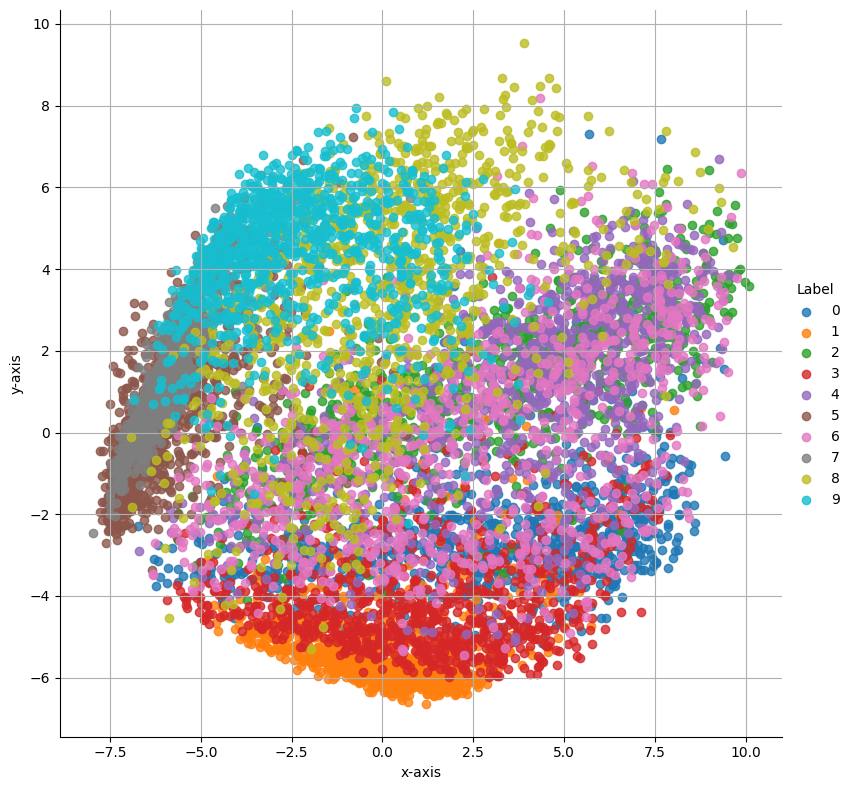

In [21]:
pca = PCA(n_components= 50)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)
testDF = pd.DataFrame(data=test_PCA.loc[:,0:1], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.grid()

KMeans with PCA

|dimensions|784|100|50|10|
|----------|----|----|----|----|
|ARI|0.4608202842559773|0.40056670421173496|0.4034428974673212|0.42136209155864074|

In [22]:
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate,
            perplexity=perplexity, early_exaggeration=early_exaggeration, init=init)

Dimension 784

0.4608202842559773

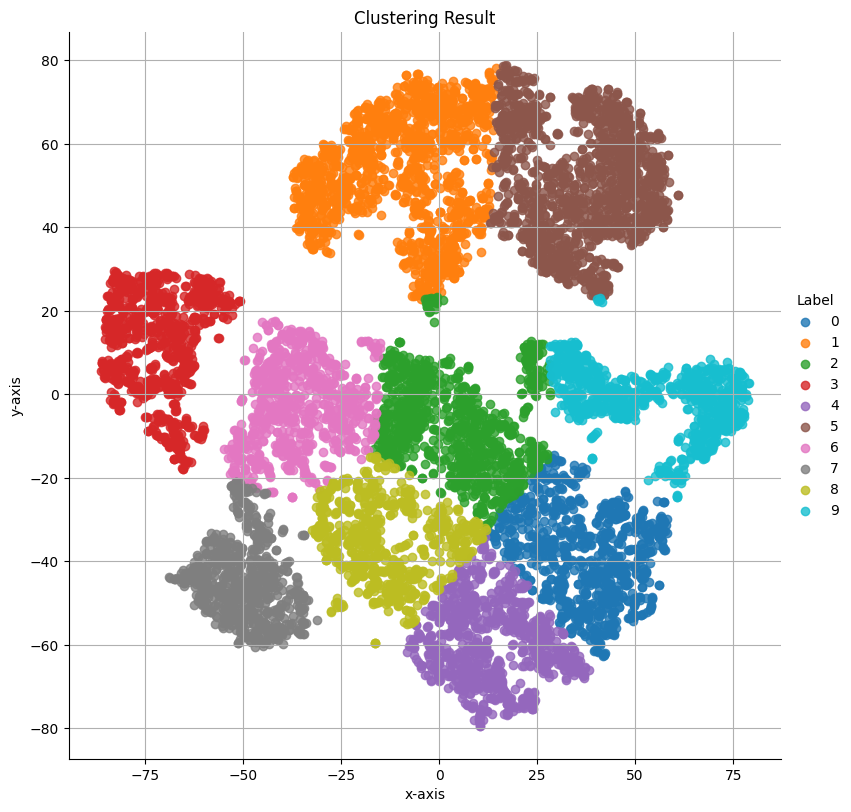

In [23]:
X_test_tSNE = tSNE.fit_transform(X_.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

kmeans=KMeans(n_clusters=10,random_state=0,n_init="auto").fit(X_test_tSNE)
labels=kmeans.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 100

0.40056670421173496

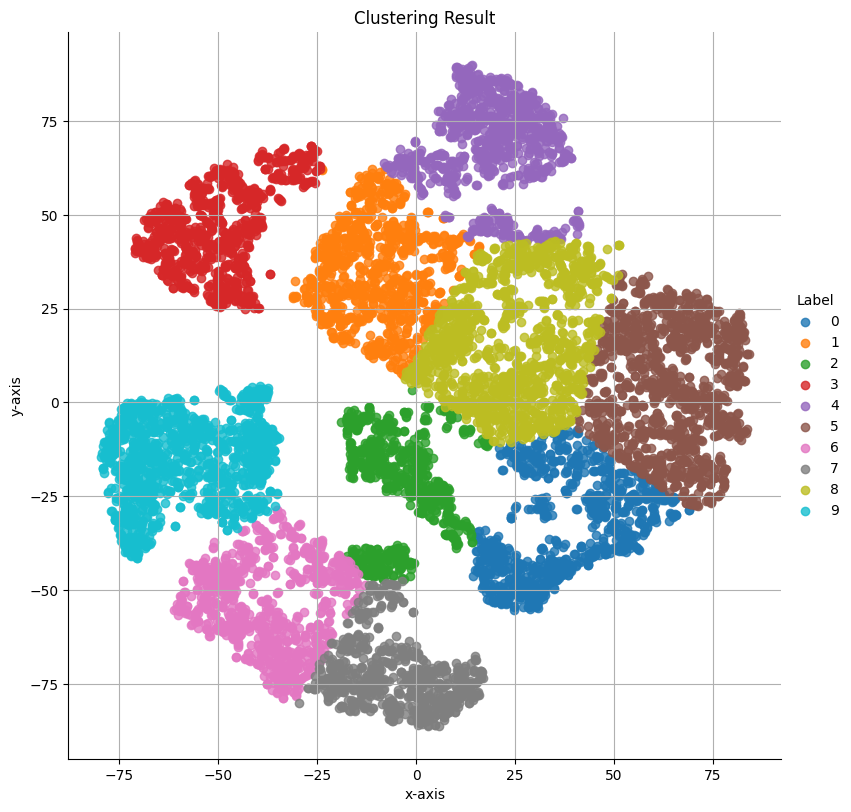

In [24]:
pca = PCA(n_components= 100)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

kmeans=KMeans(n_clusters=10,random_state=0,n_init="auto").fit(X_test_tSNE)
labels=kmeans.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 50

0.4034428974673212

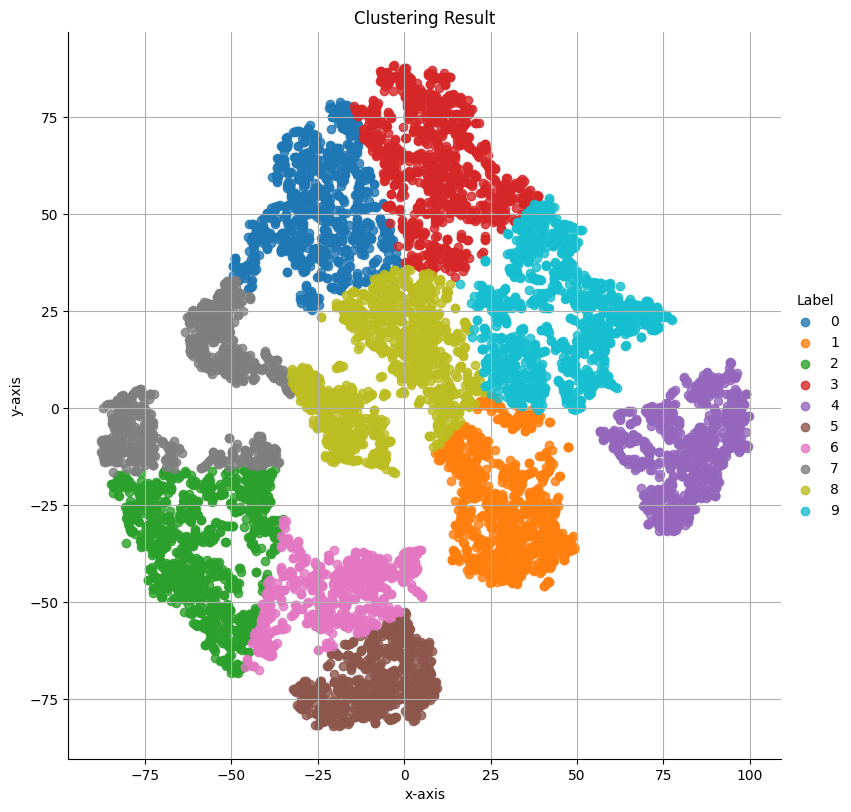

In [25]:
pca = PCA(n_components= 50)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

kmeans=KMeans(n_clusters=10,random_state=0,n_init="auto").fit(X_test_tSNE)
labels=kmeans.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 10

0.42136209155864074

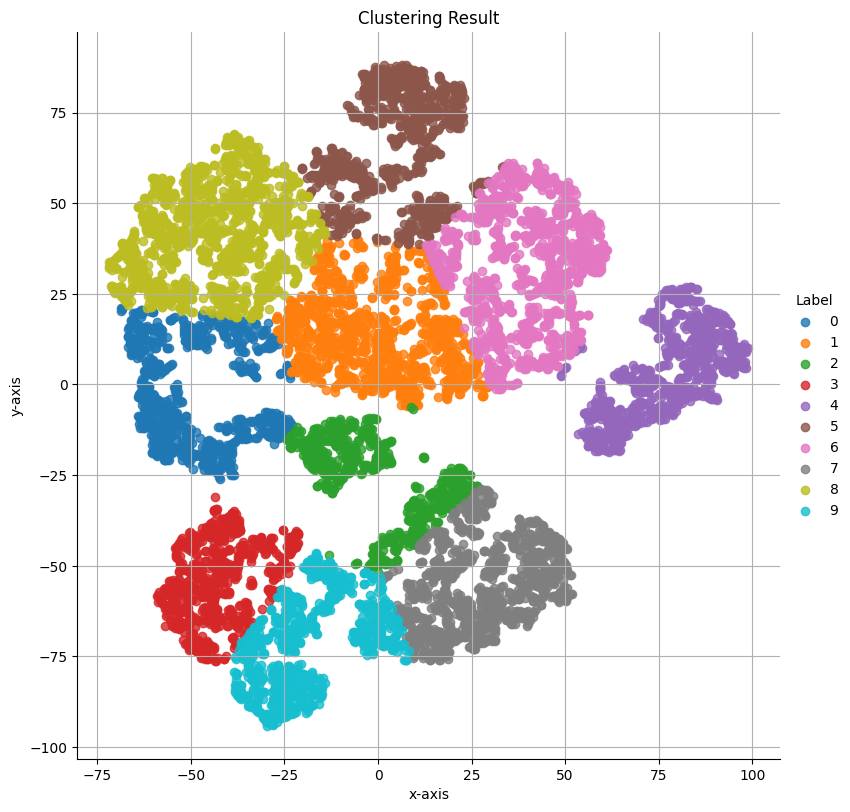

In [26]:
pca = PCA(n_components= 10)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

kmeans=KMeans(n_clusters=10,random_state=0,n_init="auto").fit(X_test_tSNE)
labels=kmeans.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


DBSCAN with PCA

|dimensions|784|100|50|10|
|----------|----|----|----|----|
|ARI|0.34835031666065536|0.4655138233687382|0.30067866282432276|0.35539525894625545|

Dimension 784

In [28]:
X_test_tSNE = tSNE.fit_transform(X_.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]
ari=0.0
eri_best=1
sample_best=1
for i in range(1,10):
    for j in range(1,10):
        dbscan=DBSCAN(eps=i,min_samples=j).fit(X_test_tSNE)
        labels=dbscan.labels_
        if ari<metrics.adjusted_rand_score(labels,y_):
            ari=metrics.adjusted_rand_score(labels,y_)
            eps_best=i
            sample_best=j
            print(eps_best,sample_best,ari)
            
print(eps_best,sample_best,ari)      




1 1 0.03260187782193552
2 1 0.3219888486825403
2 4 0.4138934870727797
2 5 0.45219924474202194
2 6 0.46896444998171943
2 6 0.46896444998171943


0.34835031666065536

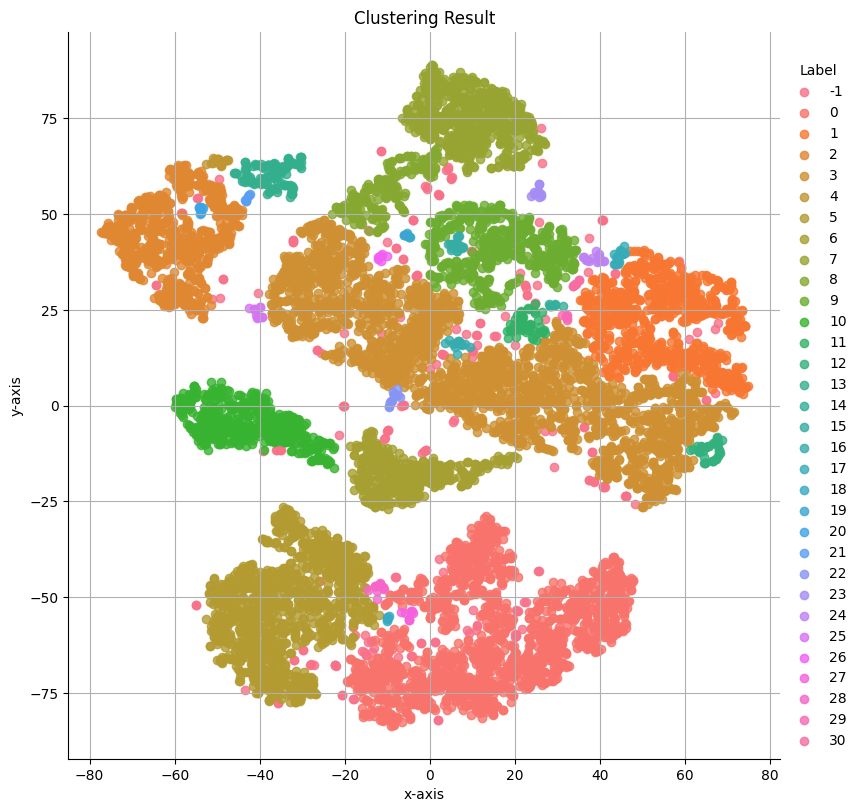

In [29]:
X_test_tSNE = tSNE.fit_transform(X_.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

dbscan=DBSCAN(eps=2,min_samples=6).fit(X_test_tSNE)
labels=dbscan.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 100

0.4655138233687382

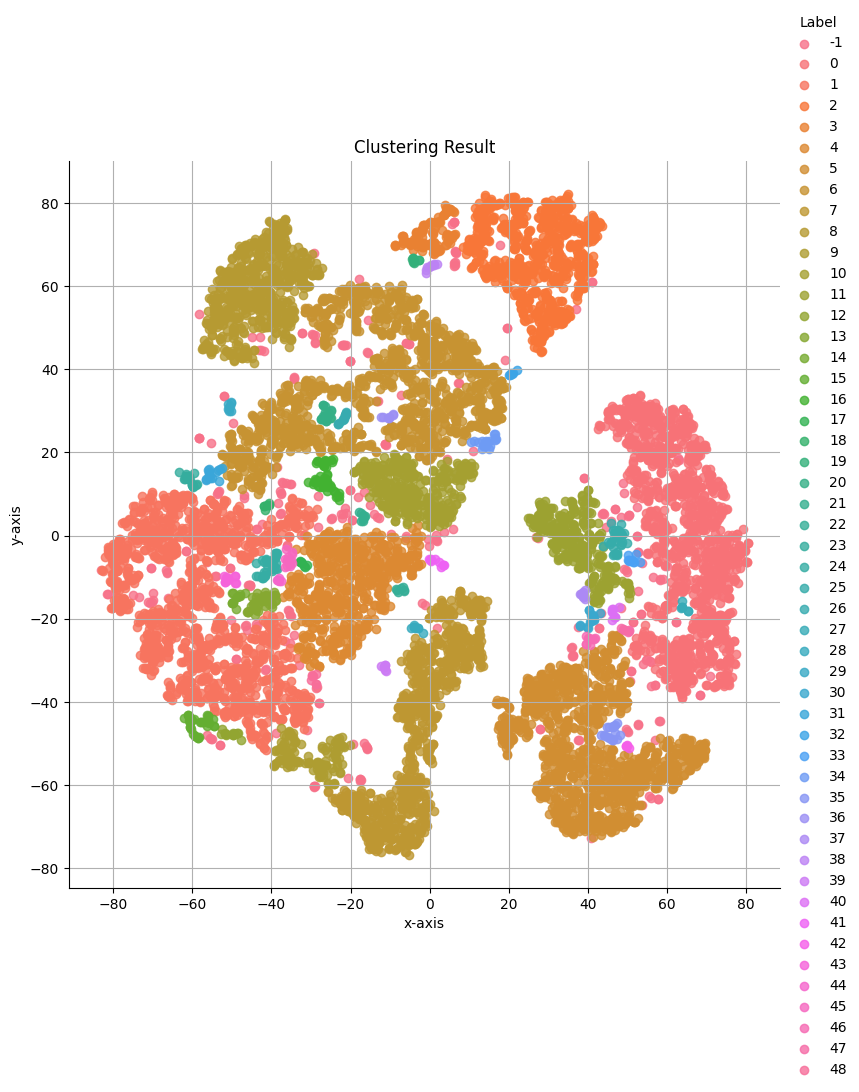

In [30]:
pca = PCA(n_components= 100)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

dbscan=DBSCAN(eps=2,min_samples=6).fit(X_test_tSNE)
labels=dbscan.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 50

0.30067866282432276

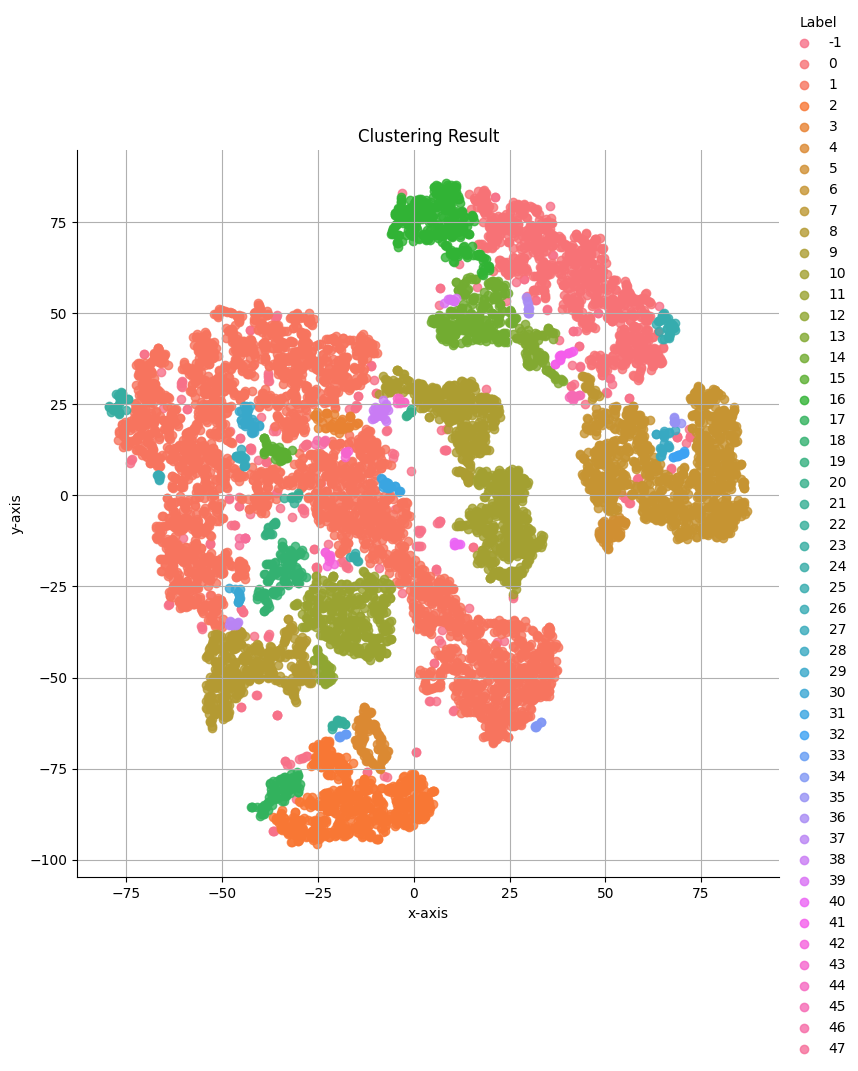

In [33]:
pca = PCA(n_components= 50)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

dbscan=DBSCAN(eps=2,min_samples=6).fit(X_test_tSNE)
labels=dbscan.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)


Dimension 10

0.35539525894625545

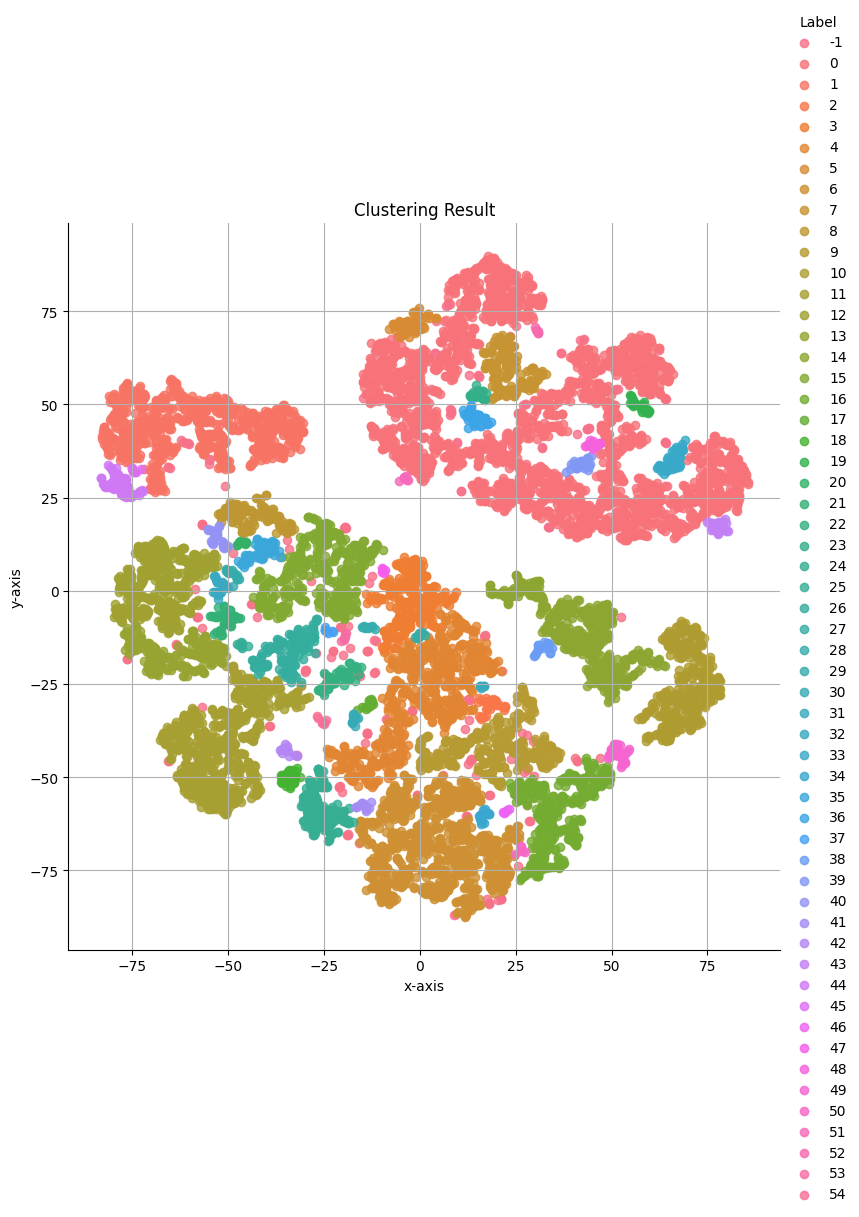

In [32]:
pca = PCA(n_components= 10)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]

################## This part should include K-means algorithm ###################

dbscan=DBSCAN(eps=2,min_samples=6).fit(X_test_tSNE)
labels=dbscan.labels_
##########################################################################

testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

metrics.adjusted_rand_score(labels,y_)
